In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import matplotlib.dates as mdates
import sympy as sp
import datetime as datetime
Fmt = mdates.DateFormatter('%H%M%S')
%matplotlib widget

In [2]:
#plot temperature
filename_save = 'CapacityandTemperature'+time.strftime('%Y%m%d_%H%M%S')+'.png'
loaddirectory_yocto = '..\\data\\Yoctopuce\\'
filename_yocto = '2023-10-30-17_03.csv'
df_yocto = pd.read_csv(loaddirectory_yocto+filename_yocto, header = None)

loaddirectory = '..\\data\\CapacityStream\\'
filename = 'StreamCapacitance20231030_170250'
savedirectory = '..\\data\\nicedata2\\'


df = pd.read_csv(loaddirectory+filename)

In [3]:
t1 = df['time'].values
c = df['Capacitance'].values
l = df['Loss'].values
v = df['Voltage'].values

t2 = df_yocto[0].values
temp = df_yocto[1].values
hum = df_yocto[2].values
pres = df_yocto[3].values

# Capacity Plots

In [4]:
# Create an empty array to store the time in seconds
t2_seconds = np.zeros(len(t2))

# Iterate through the timestamp strings and convert them to time in seconds
for i, timestamp_str in enumerate(t2):
    # Parse the timestamp string to a datetime object
    timestamp_dt = datetime.datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
    # Calculate the total seconds from the datetime object
    t2_seconds[i] = (timestamp_dt - datetime.datetime(1970, 1, 1)).total_seconds()


In [5]:
t2_seconds

array([1.69868540e+09, 1.69868541e+09, 1.69868542e+09, ...,
       1.69874162e+09, 1.69874162e+09, 1.69874164e+09])

In [6]:
t10 = (t1 - t2_seconds[0]-7*3600)
t20 = (t2_seconds - t2_seconds[0])

In [7]:
t10,t20

(array([-2.57439301e+01, -2.40339394e+01, -2.22838650e+01, ...,
         5.61477170e+04,  5.61522200e+04,  5.61539505e+04]),
 array([0.0000e+00, 1.0000e+01, 2.0000e+01, ..., 5.6217e+04, 5.6227e+04,
        5.6237e+04]))

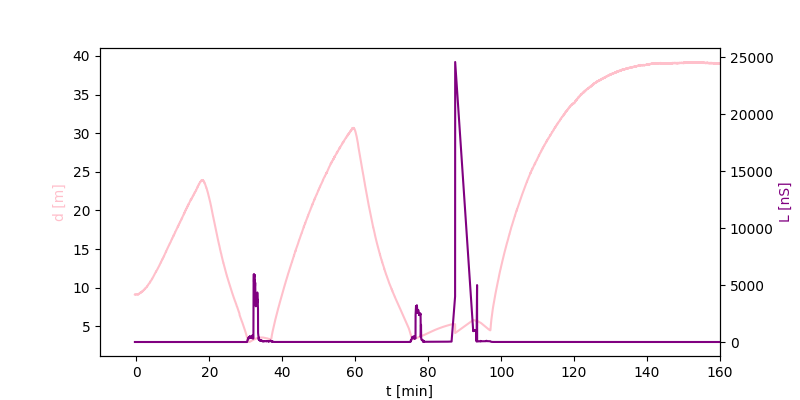

In [13]:
# to get the plots with distance and not capacity (7388.957)/c *10**(-6) to get it in m
plt.figure(5, figsize=(8,4))
plt.plot(t10/60,(7.0101299782494926e-15/(c*1e-12))*1e6,'pink')
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(t10/60,l, 'purple')
ax.set_ylabel("d [m]", color ='pink')
ax.set_xlabel("t [min]")
ax2.set_ylabel("L [nS]", color ='purple')
ax.set_xlim(-10,160)
plt.show()
plt.savefig(savedirectory+filename_save + '.png')


# Yocto Plots

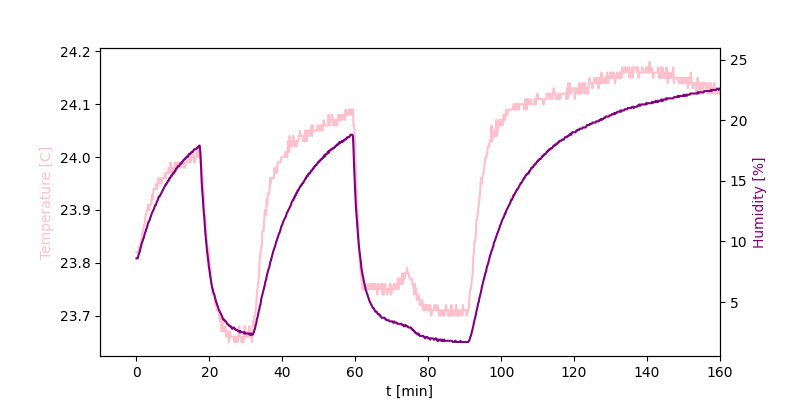

In [17]:
plt.figure(6, figsize=(8,4))
plt.plot(t20/60,temp,'pink')
ax = plt.gca()
ax2 = ax.twinx()
#ax3 = ax.twinx()
ax2.plot(t20/60,hum, 'purple')
#ax3.plot(t20/60,pres, 'blue')
ax.set_ylabel("Temperature [C]", color ='pink')
ax.set_xlabel("t [min]")
#ax2.set_ylabel("Pressure")
ax2.set_ylabel('Humidity [%]', color ='purple')
ax.set_xlim(-10,160)
plt.show()

In [16]:
t2

array(['2023-10-30 17:03:18', '2023-10-30 17:03:28',
       '2023-10-30 17:03:38', ..., '2023-10-31 08:40:15',
       '2023-10-31 08:40:25', '2023-10-31 08:40:35'], dtype=object)

In [10]:
t2_seconds

array([1.69868540e+09, 1.69868541e+09, 1.69868542e+09, ...,
       1.69874162e+09, 1.69874162e+09, 1.69874164e+09])

In [ ]:


#x_values_h = x_values*2/(60*60)

#plot c vs distance too and compare to temperature

plt.plot(x_values_h, y_values, '.')
plt.xlabel('time[h]')
plt.ylabel('capacitance[pF]')
# plt.show()
plt.savefig(loaddirectory+filename+'Plot_h' + '.png')

#plot corresponding c  to d
d_c = []
# cap_to_sep = lambda c: (7388.957)/c *10**(-6)
# initial_separation = cap_to_sep(c)
# d_micron=initial_separation*10**6


plt.plot(x_values, (7388.957)/np.array(y_values), '.')
plt.xlabel('time[h]')
plt.ylabel('d[$\mu m$]')
# plt.show()
plt.savefig(loaddirectory+filename+'Plot_d' + '.png')


#plot temperature




x_yocto = df_yocto[0]

y_yocto = df_yocto[1]

plt.plot(x_yocto, y_yocto, '.')
plt.xlabel('time[h]')
plt.ylabel('Temperature [C]')
plt.show()
plt.savefig(loaddirectory+filename+'.png')

# title